<a href="https://colab.research.google.com/github/efh32/TensorFlow-practice/blob/master/1_layer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as k
import tensorflow.keras.layers as kl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
data, labels = make_classification(n_samples=1000, n_features = 2, n_redundant=0,n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(data, labels)

In [ ]:
np.savetxt('X_train.csv', X_train)
np.savetxt('X_test.csv', X_test)
np.savetxt('y_train.csv', y_train)
np.savetxt('y_test.csv', y_test)

In [ ]:
!ls

sample_data  X_test.csv  X_train.csv  y_test.csv  y_train.csv


In [ ]:

X_train = np.loadtxt('X_train.csv')
X_test = np.loadtxt('X_test.csv')
y_train = np.loadtxt('y_train.csv')
y_test = np.loadtxt('y_test.csv')

y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(X_train[:5])
print(y_train[:5])
print(X_test[:5])
print(y_test[:5])


[[-0.91662835  1.29466482]
 [ 0.9655972  -0.88773106]
 [-1.34209564 -0.41327558]
 [-1.09570403 -0.26910964]
 [-0.54846303 -1.73857713]]
[1 0 1 0 0]
[[-0.66858545  1.52806954]
 [ 0.43931108 -1.30738403]
 [-1.08702907 -1.12004607]
 [ 0.40342901 -0.9421445 ]
 [-0.59860747  2.39915528]]
[1 0 0 0 1]


In [ ]:
model = k.Sequential()
model.add(kl.Dense(1, input_shape=(2,), activation='sigmoid', bias_initializer='he_normal', name='layer1'))

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')
model.fit(X_train, y_train, batch_size=32, epochs=1000, verbose=0)

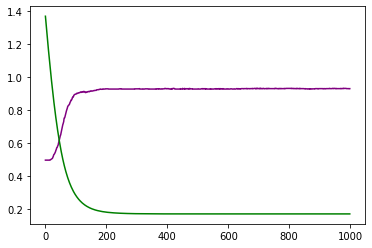

In [ ]:
plt.plot(model.history.history['accuracy'],c='purple')
plt.plot(model.history.history['loss'],c='g')

In [ ]:
c1_train = X_train[y_train==0]
c2_train = X_train[y_train==1]

We can extract the weights biases that were trained by the training data.  We can use the weights from the trained model in order to create the line that shows how the model makes a prediction for new data points.   

Linear regression for two inputs :
$f(x) = w_1*i_1 + w_2*i_2 + b$

Sigmoid function: 
$prediction = \frac{1}{1+e^{-f(x)}}$

When $f(x) = 0$ the sigmoid function produces a value of $0.5$.  If $f(x)$ is a positive value the sigmoid function produces a value greater than $0.5$.  The larger the positive value, the closer the value is to $1$.  A negative value produces a value less than $0.5$ where the smaller the value the closer the value is to $0$.  A line can partition the classes when $w_1*i_1 + w_2*i_2 + b = 0$.


In order to plot the line, we need two points on the line.  We can assume we know the value for $i_1$ and solve for $i_2$: 

$w_1*i_1 + w_2*i_2 + b = 0$

$w_2*i_2= (-1)(w_1*i_1 + b)$

$i_2= \frac{(-1)(w_1*i_1 + b)}{w_2}$


In [ ]:
layer1 = model.get_layer('layer1')
weights1 = layer1.get_weights()

print(weights1)

[array([[-0.03863887],
       [ 4.187705  ]], dtype=float32), array([0.46213484], dtype=float32)]


In [ ]:
x1, x2 = -4, 4

def func1(x):
  return (-1)*(-0.03863887*x + 0.46213484)/(4.187705)

y1 = func1(x1)
y2 = func1(x2)

This plot shows the hyperplane that separates the training data.  

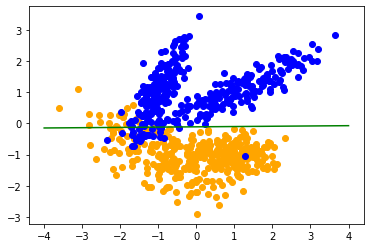

In [ ]:
plt.scatter(c1_train[:,0],c1_train[:,1],c='orange')
plt.scatter(c2_train[:,0],c2_train[:,1],c='b')
plt.plot([x1,x2],[y1,y2],c='g')

In [ ]:
c1_test = X_test[y_test==0]
c2_test = X_test[y_test==1]

This plot shows the hyperplane that separates the test data.

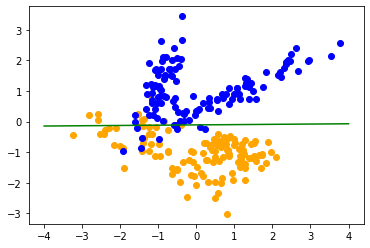

In [ ]:
plt.scatter(c1_test[:,0],c1_test[:,1],c='orange')
plt.scatter(c2_test[:,0],c2_test[:,1],c='b')
plt.plot([x1,x2],[y1,y2],c='g')